In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return (3*(x**2)) - (4*x) + 5 

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

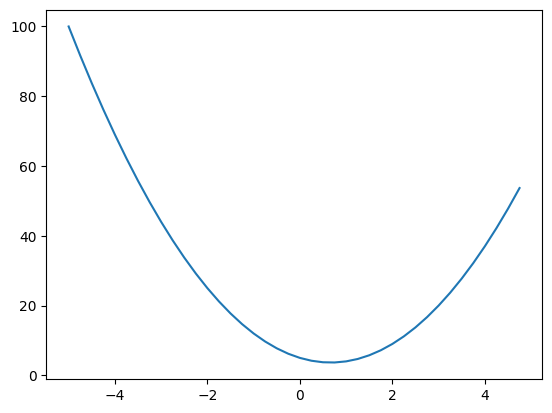

In [6]:
plt.plot(xs, ys)

##### What is the derivative of this function along the graph? ie. slope? We could solve the above expression and arrive at derivative. However, in real life nobody does it this way. Instead we look at symbolic definition of derivative and arrive at what it means.

![Derivative_formula](Derivative.png "Title")

##### This formula means if we slightly bump up the function f(x) by f(x+h), h being a very small number, does it respond positively or negatively and by how much, this is the slope of this function at that point x.

In [7]:
h = 0.001
x = 3.0

In [8]:
f(x)

20.0

##### If we nudge the number slightly by a small number h what do we expect the function to do?

In [9]:
f(x+h)  #It responded positively as also seen from the graph.

20.014003000000002

##### And by how much did it respond? To arrive at this what we do is, take (f(x+h) - f(x)) ie take new - old and normalize it by h ie divide by h.

In [10]:
h = 0.00000001      # taking very small value of x
x = 3.0
(f(x+h) -f(x))/h

14.00000009255109

##### Let's do our arthimatic way, differentiating the function (3*(x**2)) - (4*x) + 5  will give 6x -4. Plugging in 3 for x we get, 18-4 = 14. Same as above!

In [11]:
# another example:
h = 0.00000001
x = -3.0            # What is the slope for this?
                    # It is hard to tell the exact value
                    # without calculating. But the sign 
                    # would be -ve as seen from the graph.
(f(x+h) -f(x))/h

-22.00000039920269

In [12]:
# Making things more complicated.
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


##### How to find the derivative of d with respect to a, b and c? So instead of mentally calculting / arithmatic method we will use the formula above to calculate the derivative

In [13]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h              # partial derivate wrt a.

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)



d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [14]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h              # partial derivate wrt b.

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [15]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h              # partial derivate wrt c.

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


##### We would like to go into neural network right now. But nn are massive expressions. So we need some data structures that maintain these structures.

In [16]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"

In [17]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [18]:
#a + b   # Python doesn't know how to add Value objects.
        # So we will specify that right now.

In [19]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out      

##### What happens above is when we do a + b what python does is a.__add__(b) internally. The other will be other value object, in this case b. Inside this bracket (self.data + other.data) its just floating point addition that happens. Then we apply it to a Value class again which is then returned. This outputs an object of Value class.

In [20]:
a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

In [21]:
class Value:
    def __init__(self, data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

##### With the above object implemented, we should be able to implement the above expression completely.

In [22]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a*b + c         # This evalutes to (a.__mul__(b)).__add__(c)


Value(data=4.0)

In [23]:

(a.__mul__(b)).__add__(c)

Value(data=4.0)

##### Now we need a way to keep a record of operations. Operations that led to the creation of new Value objects and we do it in the following manner.

In [24]:
class Value:
    def __init__(self, data, _children = ()):                   # default creation will get _children = ().
        self.data = data
        self._prev = set(_children)
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))      # But if we were to create it using + we state the _children as self and other.
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))      # But if we were to create it using * we state the _children as self and other.
        return out

In [25]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [26]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

##### We now know the children of an operation. But we don't know what operation created it, so we do the following:

In [27]:
class Value:
    def __init__(self, data, _children = (), _op = ""):                   # default creation will get _children = ().
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        return out

In [28]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [29]:
d._op

'+'

In [30]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()           # Create 2 empty sets nodes, edges
  def build(v):
    if v not in nodes:                  # If the input is not part of nodes add it.
      nodes.add(v)
      for child in v._prev:             # _prev has 2 elements. Add each as an edge child1 --> v and child2 --> v
        edges.add((child, v))
        build(child)                    # Do the same recursively
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

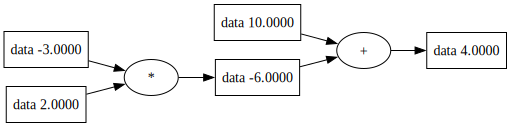

In [31]:
draw_dot(d)

##### Let's add labels to the graph, by modifying the code above.

In [33]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        return out

a = Value(2.0, label = "a")
b = Value(-3.0, label = "b")
c = Value(10.0, label = "c")
e = a*b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label = "f")
L = d*f
L.label = "L"
L

Value(data=-8.0)

In [34]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()           # Create 2 empty sets nodes, edges
  def build(v):
    if v not in nodes:                  # If the input is not part of nodes add it.
      nodes.add(v)
      for child in v._prev:             # _prev has 2 elements. Add each as an edge child1 --> v and child2 --> v
        edges.add((child, v))
        build(child)                    # Do the same recursively
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

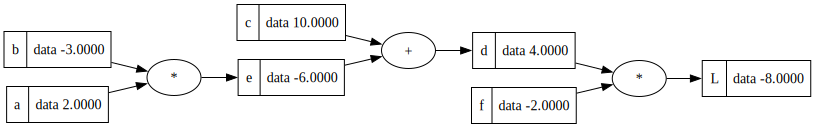

In [35]:
draw_dot(L)

##### Recap: We are able to build an expression for forward pass using mul and add. The output of forward pass is -8 in this case. Next we are going to do backpropogation across each of the nodes. What this means is calculating derivative of L with respect to each node. In nn setting we are intereted in derivative of loss function L with respect to weights. Also we will not want to change the data leaf nodes as they are the input data which are fixed. Next we are going to create a variable called grad inside the Value object. This will keep record of derivative of L with respect to that node.

In [36]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        return out

In [37]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()           # Create 2 empty sets nodes, edges
  def build(v):
    if v not in nodes:                  # If the input is not part of nodes add it.
      nodes.add(v)
      for child in v._prev:             # _prev has 2 elements. Add each as an edge child1 --> v and child2 --> v
        edges.add((child, v))
        build(child)                    # Do the same recursively
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

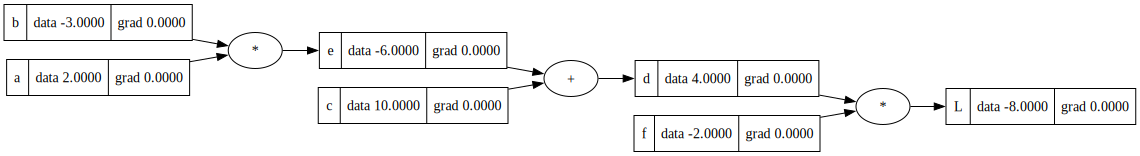

In [39]:
a = Value(2.0, label = "a")
b = Value(-3.0, label = "b")
c = Value(10.0, label = "c")
e = a*b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label = "f")
L = d*f
L.label = "L"
L
draw_dot(L)

##### Let's fill the gradients and do backpropogation manually. We need to calculate dL/dNode where node is of intereset.

0.9999999999999787


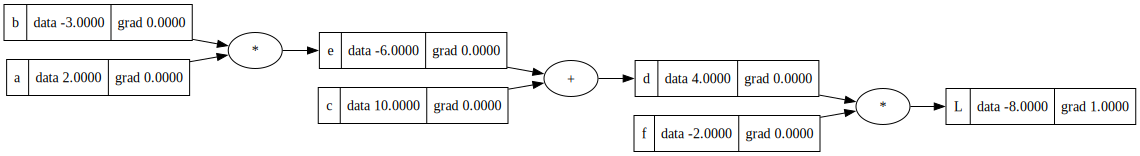

In [62]:
# We need to calculate dL/dL first

def lol():
    # created this staging function to prevent the variables from polluting
    # global variables.
    h = 0.01

    a = Value(2.0, label = "a")
    b = Value(-3.0, label = "b")
    c = Value(10.0, label = "c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label = "f")
    L = d*f; L.label = "L"
    print((L.data + h - L.data)/h)

lol()
# Therefore dL/dL = 1.0
L.grad = 1.0
draw_dot(L)


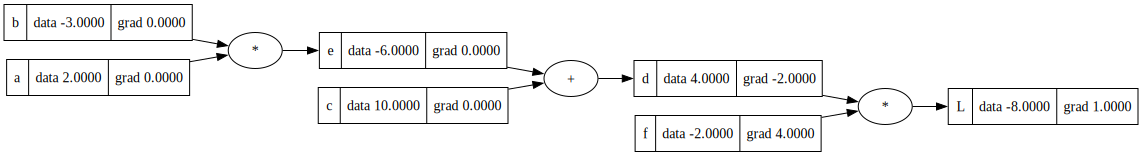

In [ ]:
# We need to calculate dL/dd next
"""
L = d*f
"""

# We need to calculate dL/dd which will be just f.

"""
(f(x+h) - f(x))/h
((d+h)*f - d*f)/h
(df+hf-df)/h
hf/h
==> f
"""
# Similally by symmetry dL/df will be d. Therfore...
d.grad = f.data
f.grad = d.data

draw_dot(L)


##### Now we need to calculate dL/de and dL/dc. This is the most important part of backpropogation!!! We know how to calculate. How to derive dL/dc? We know dL/dd and we can calculate dd/dc. If we multiply dL/dd * dd/dc, we would can get dL/dc. This is chain rule. Now lets calculate dd/dc.

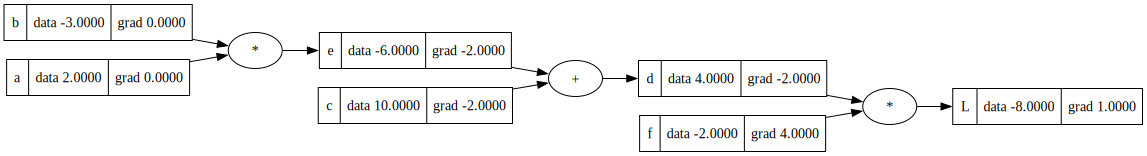

In [65]:
"""
d = e + c
dd/dc = 1

We can also verify the same by calculating manually.

(f(x+h) - f(x))/h
(e + c + h - (e + c))/h
(e + c + h - e - c)/h
h/h
==> 1

Therefore dL/dc = dL/dd * dd/dc

c.grad = d.grad * 1
------------------------------------
Similarly for dL/de:
d = e + c
dd/de = 1

We can also verify the same by calculating manually.

(f(x+h) - f(x))/h
(e + h + c - (e + c))/h
(e + h + c - e - c)/h
h/h
==> 1

Therefore dL/de = dL/dd * dd/de

e.grad = d.grad * 1

"""
c.grad = d.grad * 1
e.grad = d.grad * 1
draw_dot(L)


##### Now we need to calculate dL/da and dL/db. This is simply dL/de * de/da and dL/de * de/db.

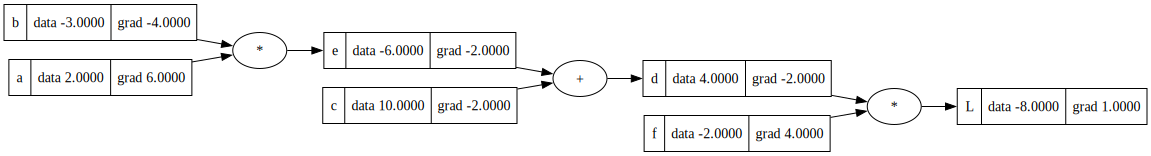

In [66]:
"""
e = a*b
de/da = b
de/db = a

dL/da = dL/de * de/da ==> -2 * -3
dL/db = dL/de * de/db ==> -2 * 2

"""
a.grad = e.grad * b.data
b.grad = e.grad * a.data

draw_dot(L)

##### In summary, when there is mul the .data is exchange and multiplied by the output node's grad. When + is used, the output node's grad is distributed to the 2 input node's as the local gradient there is 1. So just 1 * output node's grad.

##### Now lets say we want to nudge the L to go up meaning from -8 towards -7, -6 etc. We need to nudge the data of the leaf nodes in the same direction as their grads.

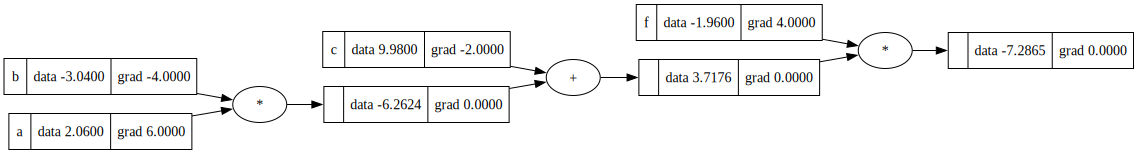

In [67]:
h = 0.01
a.data += h*a.grad
b.data += h*b.grad
c.data += h*c.grad
f.data += h*f.grad

e = a*b
d = e + c
L = d*f

draw_dot(L)


##### Now we build an actual nn neuron and we shall apply backpropogation manually.

![neural_network](neural_network.png "Title")

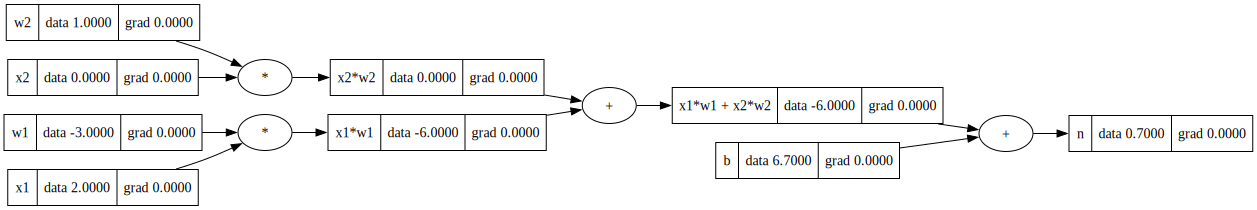

In [68]:
# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Arbitary weights w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Arbitary bias b
b = Value(6.7, label = "b")

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

draw_dot(n)

##### The above is the basic neuron, but without activation function, so now lets implement tanh() as the activation.

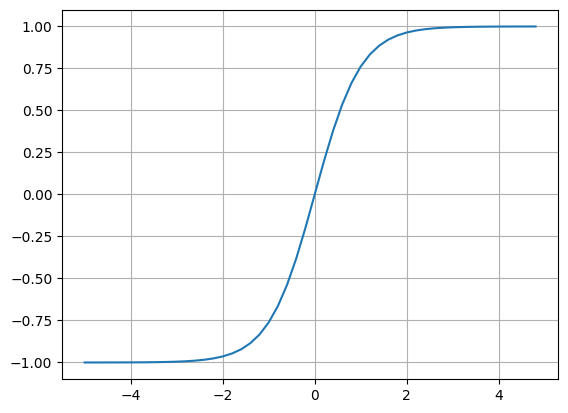

In [70]:
# Following is how tanh() looks like:

plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

##### But now we cannot apply .tanh() to the nodes, because we only have add and mul. With these 2 we cannot create tanh(). However when we create value object, we don't need to always create most elemental objects like +, -, * and / etc. We can use any arbitary complex expression as long as we know how to differentiate through it, its ok. The object operations can be elemental or very complex it doesn't matter. So we will aim to create tanh directly in the value object.

![tanh_formula](tanh.png "Title")

In [72]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")
        return out

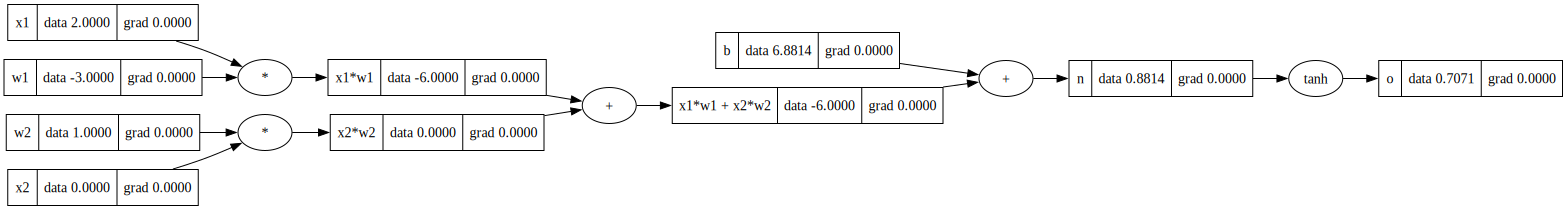

In [78]:
# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Arbitary weights w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Arbitary bias b
b = Value(6.8813735870195432, label = "b")      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
o = n.tanh(); o.label = "o"

draw_dot(o)

##### We know the derivative of all except tanh. We use the 1 - (tanh(x)**2). As per the formula below.

![tanh_derivative](tanh_derivative.png "Title")

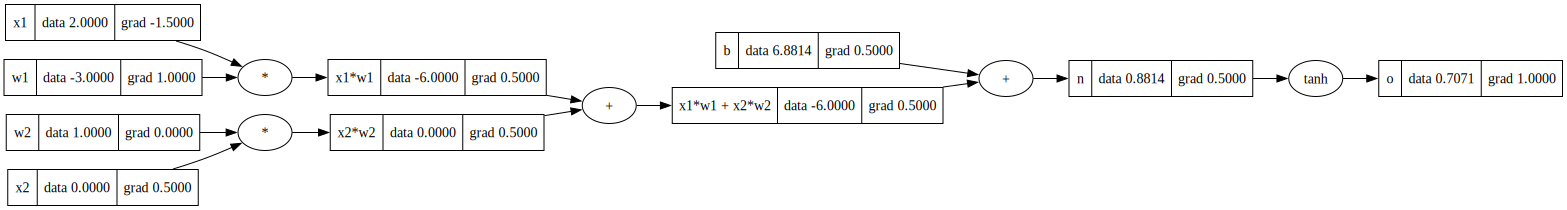

In [79]:
# Now we do backpropogation manually.

'''
do/do = 1 

o = tanh(n)
do/dn = 1 - (tanh(n)**2) ==> 1 - (o.data**2) ==> 0.4999999 rounded to 0.5

n = x1w1 + x2w2 + b
do/db = do/dn * dn/db ==> 0.5 * 1 ==> 0.5
do/d(x1w1 + x2w2) = do/dn * dn/d(x1w1 + x2w2) ==> 0.5 * 1 ==> 0.5


do/d(x1w1) = do/d(x1w1 + x2w2) * d(x1w1 + x2w2)/d(x1w1) ==> 0.5 * 1 ==> 0.5
do/d(x2w2) = do/d(x1w1 + x2w2) * d(x1w1 + x2w2)/d(x2w2) ==> 0.5 * 1 ==> 0.5


do/d(x1) = do/d(x1w1) * d(x1w1)/d(x1) ==> 0.5 * w1.data ==> 0.5 * -3 ==> -1.5
do/d(w1) = do/d(x1w1) * d(x1w1)/d(w1) ==> 0.5 * x1.data ==> 0.5 * 2 ==> 1.0

do/d(x2) = do/d(x2w2) * d(x2w2)/d(x2) ==> 0.5 * w2.data ==> 0.5 * 1 ==> 0.5
do/d(w2) = do/d(x2w2) * d(x2w2)/d(w2) ==> 0.5 * x2.data ==> 0.5 * 0 ==> 0.0

'''

o.grad = 1.0
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x1.grad = -1.5
w1.grad = 1.0
x2.grad = 0.5
w2.grad = 0.0

draw_dot(o)

##### We will now stop doing manual back propogation and start implementing the same using the Value object we created earlier.

In [113]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

##### Now we can apply back propogation to the graph in the right order and we can have the back propogation calculated. But we need to watch out cuz the the end node .grad is set to 0. So the backprop will not happen because of self.grad = (1 - t**2) * out.grad. The out.grad is 0 during inialization self.grad = 0.0. So we need to set it manually to 1.0, then we can call ._backprop on each node one at a time in proper sequence. We re-initialize the same example as above. This time we will be using ._backprop function on them.

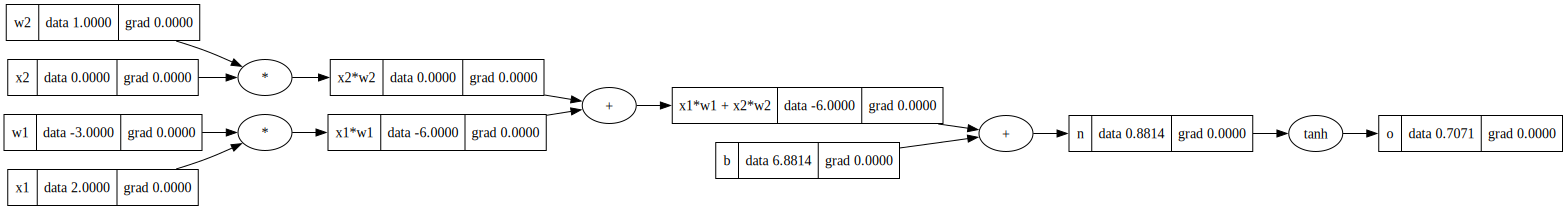

In [114]:
# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Arbitary weights w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Arbitary bias b
b = Value(6.8813735870195432, label = "b")      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
o = n.tanh(); o.label = "o"

draw_dot(o)

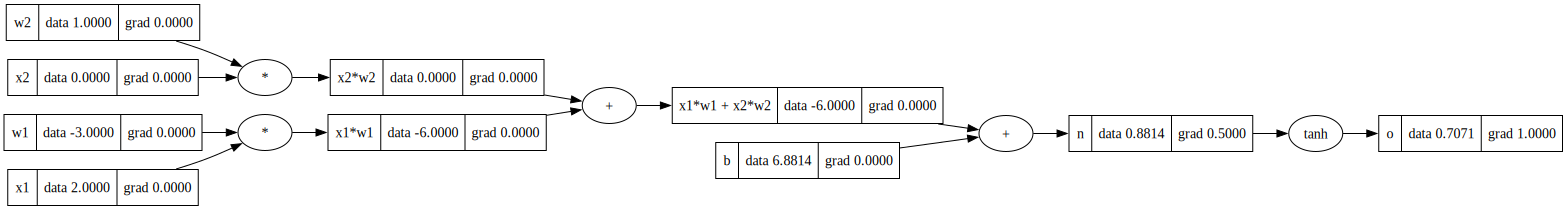

In [115]:
o.grad = 1.0
o._backward()
draw_dot(o)

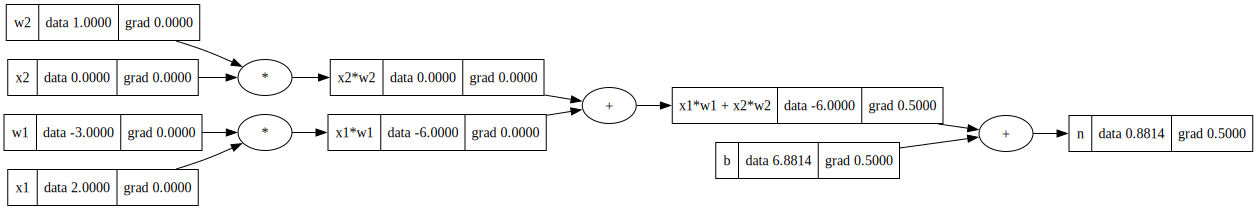

In [116]:
n._backward()
draw_dot(n)

##### Now we can call b._backward() however nothing will happen because of this line. self._backward = lambda: None.

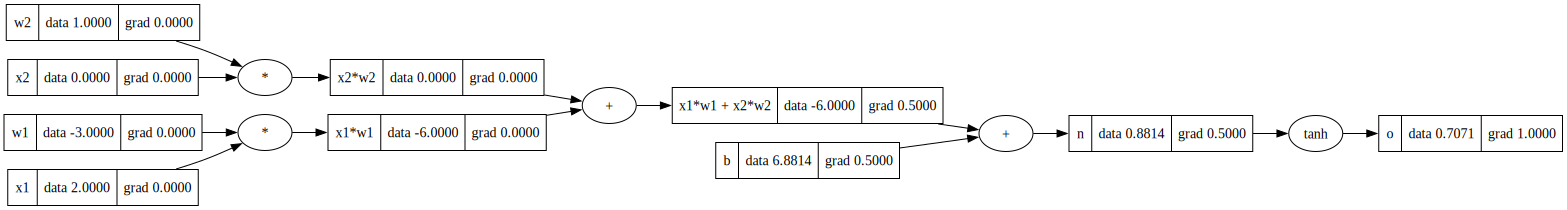

In [117]:
b._backward()
draw_dot(o)


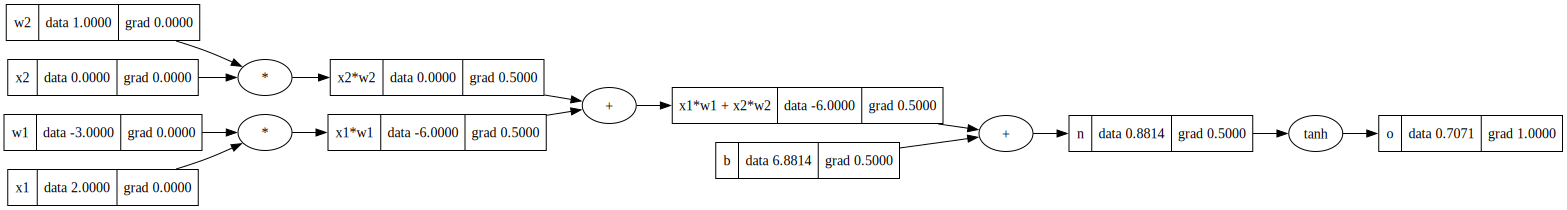

In [118]:
x1w1x2w2._backward()
draw_dot(o)

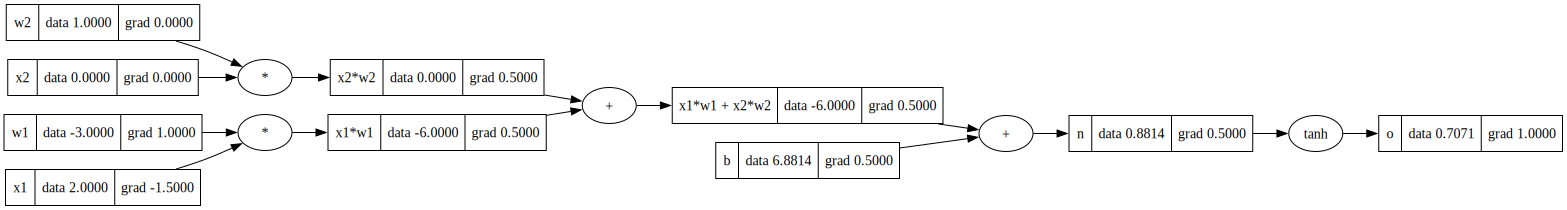

In [119]:
x1w1._backward()
draw_dot(o)

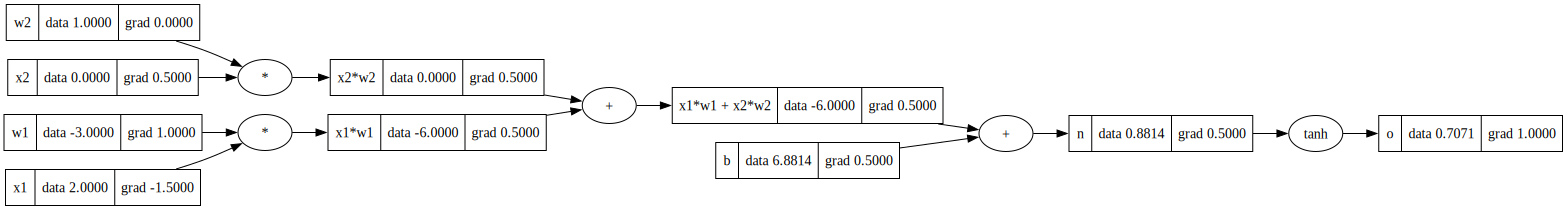

In [121]:
x2w2._backward()
draw_dot(o)

##### Now everything is great! but now we call this ._backward() function sequentially. This can be made automatic if we perform topological sort. Topological sort is a method where if we have a directed (Arrowed), acyclic (no loops) network graph and if we give a starting node, we can come up with another graph such that all arrows goes from left to right.

![topological_sort](topological_sort.png "Title")

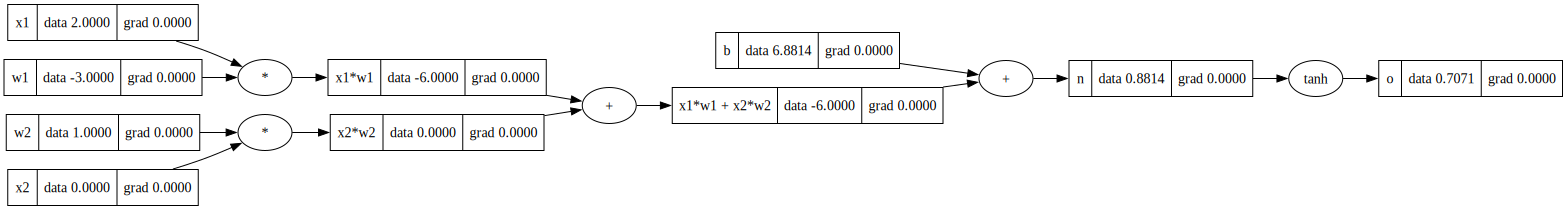

In [124]:
# Reinitialize the same example as above.
# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Arbitary weights w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Arbitary bias b
b = Value(6.8813735870195432, label = "b")      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
o = n.tanh(); o.label = "o"

draw_dot(o)

[Value(data=1.0), Value(data=0.0), Value(data=0.0), Value(data=-3.0), Value(data=2.0), Value(data=-6.0), Value(data=-6.0), Value(data=6.881373587019543), Value(data=0.8813735870195432), Value(data=0.7071067811865476)]
1.0
0.4999999999999999
0.4999999999999999
0.4999999999999999
0.4999999999999999
-1.4999999999999996
0.9999999999999998
0.4999999999999999
0.4999999999999999
0.0


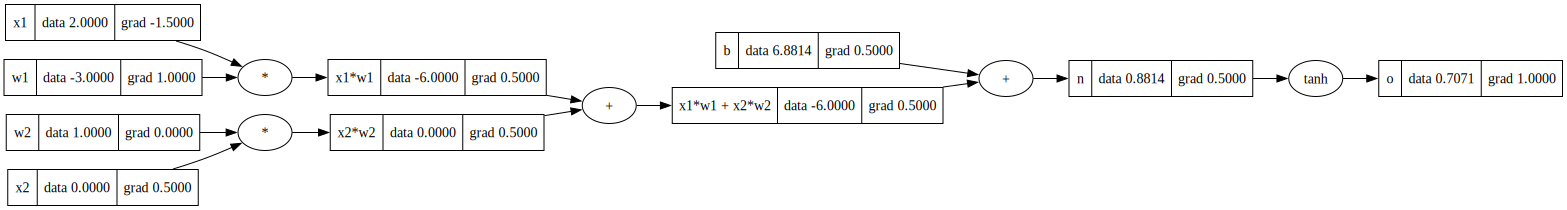

In [125]:
# Code for topological sort:
o.grad = 1.0

topo = []
visited = set()
def topological_sort(node):
    if node not in visited:
        visited.add(node)
        for child in node._prev:
            topological_sort(child)
        topo.append(node)
topological_sort(o)
print(topo)

for nodes in reversed(topo):
    nodes._backward()
    print(nodes.grad)
draw_dot(o)


##### Now we have working function of the topological sort, let's move this functionality to the Value class for easier implementation.

In [126]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

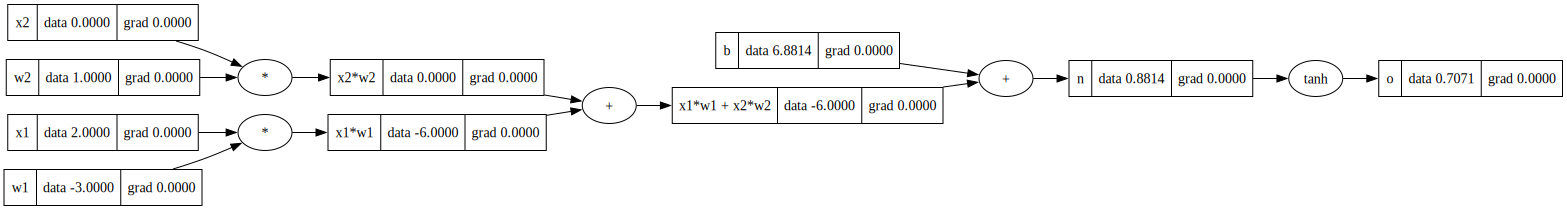

In [127]:
# Reinitialize the same example as above.
# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Arbitary weights w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Arbitary bias b
b = Value(6.8813735870195432, label = "b")      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
o = n.tanh(); o.label = "o"

draw_dot(o)

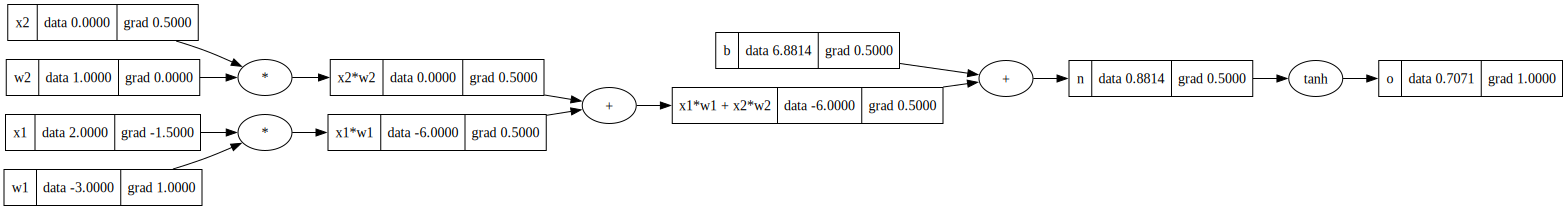

In [128]:
o.backward()
draw_dot(o)


##### All is great! But now we have a problem which we have not yet surfaced. It is illustrated below. There are 2 arrows on top of each other in the below example. The grad is 1.0 which is wrong it shold be 2.0 instead.

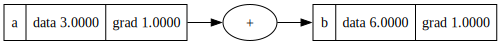

In [ ]:
'''
def _backward():
    self.grad = 1.0 * out.grad
    other.grad = 1.0 * out.grad

The problem is in above line of code. 
When self.grad is calculated it gets 1.0 * 1.0 and updates self.grad to 1.0.
When other.grad is calculated it gets 1.0 * 1.0 and updates other.grad to 1.0.

but the other is also a, so it gets overwritten. 

'''

a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

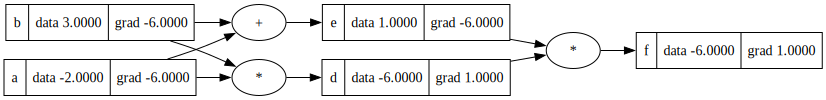

In [132]:
# Another example as below:

'''
The a.grad and b.grad are wrong as they get overwritten.
'''

a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b       ; d.label = 'd'
e = a + b       ; e.label = 'e'
f = d * e       ; f.label = 'f'

f.backward()

draw_dot(f)

##### The solutions is to accumalate the gradients. Not just overwrite them. So let's re-write the Value object and retry the same examples.

In [134]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

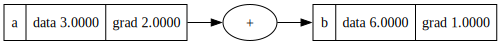

In [135]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

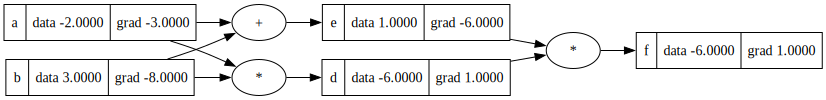

In [136]:
# Another example as below:

'''
The a.grad and b.grad are wrong as they get overwritten.
'''

a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b       ; d.label = 'd'
e = a + b       ; e.label = 'e'
f = d * e       ; f.label = 'f'

f.backward()

draw_dot(f)

##### Great now let's expand our Value objects so it supports more functions such as divide, exponentiation etc etc. But before that we fix a problem. The problem is as below.

In [ ]:
# Problem

a = Value(2.0, label = 'a')

a + 1   # This won't work because the __add__ function currently only adds 2 Value objects.
        # And not constant values. Let's fix this.

AttributeError: 'int' object has no attribute 'data'

In [147]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):

        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [148]:
# Problem Fixed

a = Value(2.0, label = 'a')

a + 1

Value(data=3.0)

In [158]:
# Another Problem

a = Value(2.0, label = 'a')

'1 + a or 1 * a wont work'      # This won't work cuz the the first argument is an int and it doesn't know
                                # how to add or multiply it with a Value object.
                                # To fix this we can use __radd__ and __rmul__ functions.
                                # __radd__ and __rmul__ are the reverse of __add__ and __mul__ functions.
                                # They are like a fallbacks for __add__ and __mul__ functions.

'1 + a or 1 * a wont work'

In [159]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):

        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __radd__(self, other):
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.
    
    def __rmul__(self, other):
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [160]:
# Problem Fixed
a = Value(2.0, label = 'a')

print(a + 2)
print(3 + a)
print(a * 2)
print(3 * a)

Value(data=4.0)
Value(data=5.0)
Value(data=4.0)
Value(data=6.0)


##### Now let's try do exponentiation and divide for the value object. Divide is a sepecial case of power, so let's implement instead. a / b ==> a * (1/b) ==> a * (b**-1)

In [ ]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):

        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __radd__(self, other):
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.
    
    def __rmul__(self, other):
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, other), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __truediv__(self, other):
        return self * (other**-1)

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [ ]:
a = Value(2.0, label = 'a')
b = Value(4.0, label = 'b')

print(a / b)
print(a ** 2)
print(a ** 3)

print(a ** 2 / b)
print(a - b)        # This won't work, cuz the __sub__ function is not yet implemented

Value(data=0.5)
Value(data=4.0)
Value(data=8.0)
Value(data=1.0)
Value(data=-2.0)


In [183]:
class Value:
    def __init__(self, data, _children = (), _op = "", label = ""):                   # default creation will get _children = ().
        self.data = data
        self.grad = 0.0         # Default set to 0 at initialization.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None   # When we initialize the object this shall be none.
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):

        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data + other.data, (self, other), "+")      # But if we were to create it using + we state the _children as self and other.

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward       # For those value objects created using +, we will automatically apply ._backward() to it.

        return out

    def __radd__(self, other):
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value object, we convert it to a Value object.
        out = Value(self.data * other.data, (self, other), "*")      # But if we were to create it using * we state the _children as self and other.
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out                       # For those value objects created using *, we will automatically apply ._backward() to it.
    
    def __rmul__(self, other):
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __truediv__(self, other):
        return self * (other**-1)

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def backward(self):

        topo = []
        visited = set()

        def topological_sort(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    topological_sort(child)
                topo.append(node)

        topological_sort(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [184]:
a = Value(2.0, label = 'a')
b = Value(4.0, label = 'b')

a - b

Value(data=-2.0)

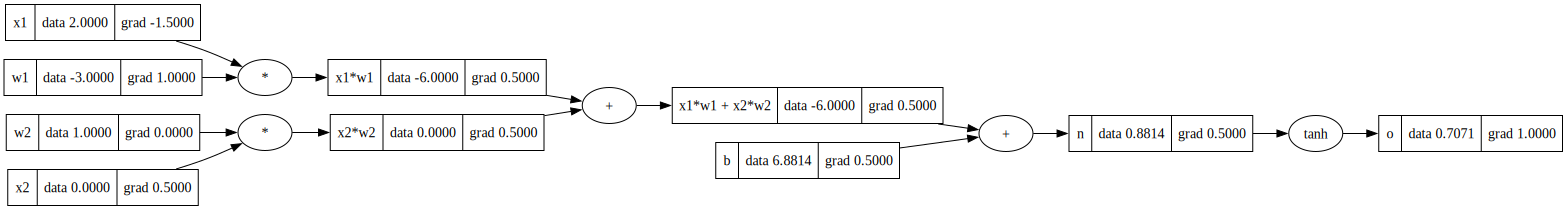

In [185]:
# Now let's go back to our original example
# and implement the tanh with elemental function.

# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias b
b = Value(6.8813735870195432, label = 'b')      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
o = n.tanh(); o.label = "o"
o.backward()
draw_dot(o)


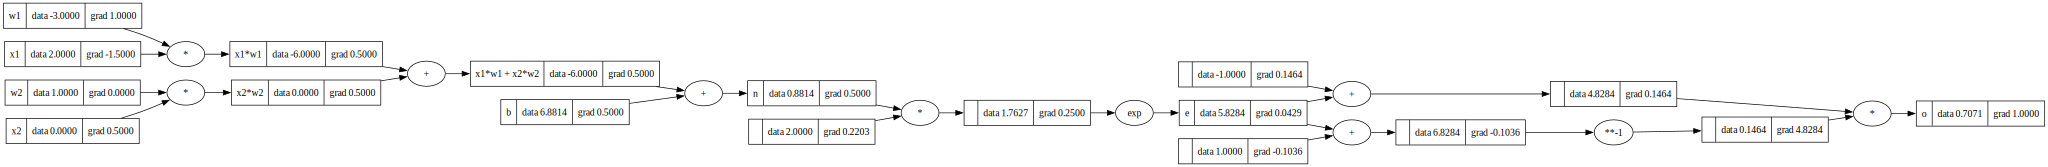

In [186]:
# Now let's go back to our original example
# and implement the tanh with elemental function.

# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias b
b = Value(6.8813735870195432, label = 'b')      # 6.88... for backpropogation later on.

# Neuron's output (y = x1*w1 + x2*w2 + b)
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b; n.label = "n"

# Applying tanh() as activation function
e = (2*n).exp(); e.label = "e"
o = (e-1)/(e+1); o.label = "o"

o.backward()
draw_dot(o)
